<a href="https://colab.research.google.com/github/PSU-Geofluids-Lab/Texture_Generators/blob/main/Testing_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vtk
!pip install porespy
!pip install numpy-stl
!pip install pypardiso
!pip install PyWavelets
!pip install numpy-hilbert-curve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.5/627.5 kB 35.8 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19876 sha256=ed1adca5eafa07fe58194005a5ec3831f15707046e2678c6f1cbbbd65084fb3c
  Stored in directo

In [31]:
!rm -rf /content/Texture_Generators
%cd /content/
!git clone https://github.com/PSU-Geofluids-Lab/Texture_Generators.git


/content
Cloning into 'Texture_Generators'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 61 (delta 20), reused 50 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 21.35 MiB | 21.50 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [32]:
%cd /content/Texture_Generators


/content/Texture_Generators


Using seed: 2168065341


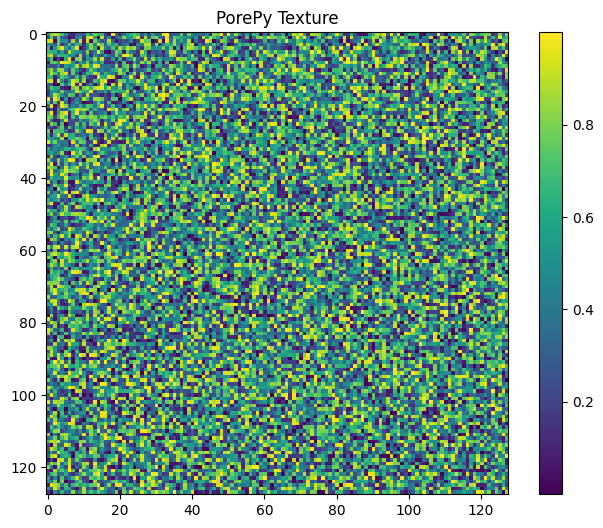

All Files saved


In [43]:
from Generators import RandomGenerator
from Plotting import ImagePlotter

# Usage Example
if __name__ == "__main__":
    # Generate texture
    base_name = "texture"
    generator = RandomGenerator(size=(128, 128),name=base_name)
    texture_data = generator.generate()

    # Plot the result
    ImagePlotter.plot(texture_data, title='PorePy Texture')
    # Save in multiple formats
    generator.to_csv()
    generator.to_png()
    generator.save_all()

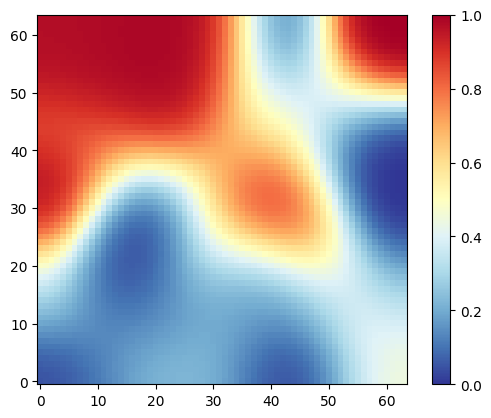

In [28]:
import matplotlib.pyplot as plt
import porespy as ps
im1 = ps.generators.blobs(shape=[64, 64], porosity=None, blobiness=[.2, .2])
#im2 = ps.generators.blobs(shape=[128, 128], porosity=None, blobiness=[1, 2])
plt.imshow(im1, cmap='RdYlBu_r',origin='lower')
plt.colorbar()

In [33]:
import Plotting_spectra as spec
import Hilbertize_image as hilbert_code

'Results/RandomGenerator/texture'

In [45]:
t, intensities = hilbert_code.make_hilbert_curve(texture_data,plot_hilbert=True,plot_reconstructed=True,
                                                 plot_hilbert_reconstructed=True,save_to_file=True,
                                                 filepath=generator.full_path)

Plotting Hilbert Curve with Hilbert Time Series
Plotting Plotting Hilbert Curve with Hilbert Curve


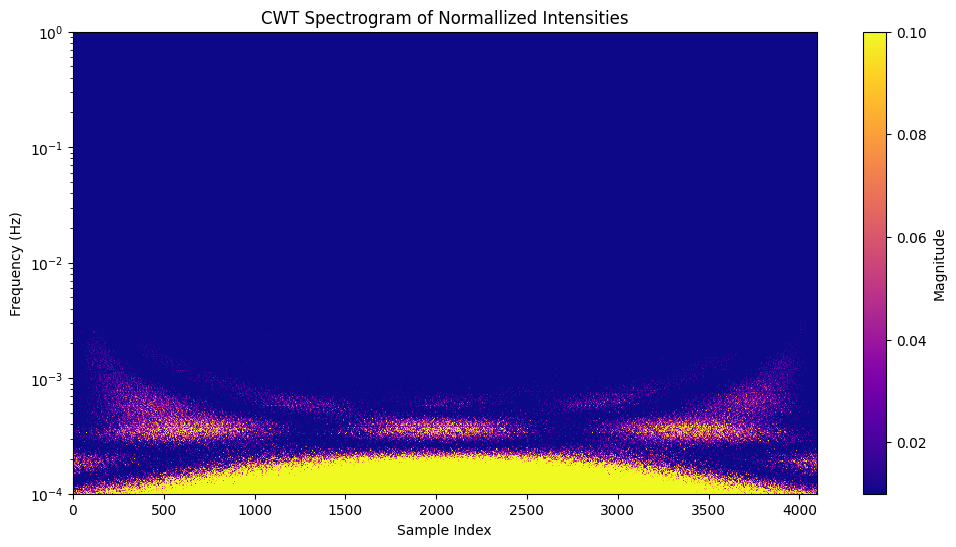

In [46]:
spec.simple_cwt_spectra_plotting(intensities,vmax=.1,vmin=0.01)

Optimal wavelet: mexh


/content/Texture_Generators/Plotting_spectra.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.95, 1]) # Adjust layout to make space for colorbar


Done!


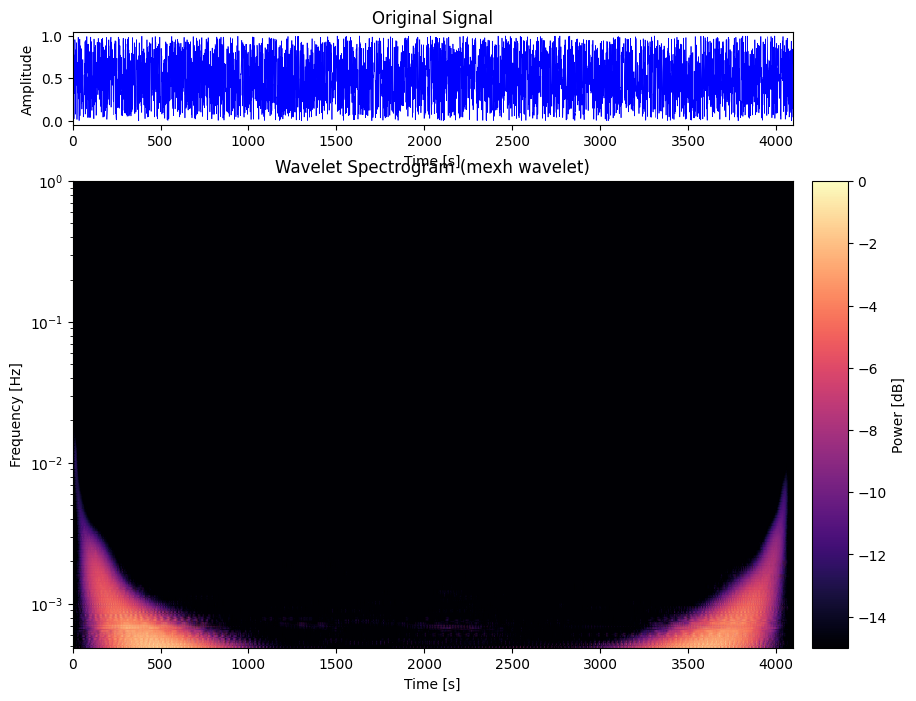

In [47]:
oe.reload(spec)
spec.basic_usage(intensities,t)